In [72]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb
from pandas.plotting import scatter_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [74]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [75]:
cursor.execute('Select * from "AHS_Household_Class"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [76]:
df.head()

,index,CONTROL,YEAR,RATINGHS,RATINGNH,TOTROOMS,PERPOVLVL,DINING,LAUNDY,STORIES,...,KITCHSINK,WASHER,WINBARS,HHHEAR,HHSEE,HHMEMRY,HHWALK,HHCARE,HHERRND,FIRSTHOME
0,0,11000006,2017,10.0,10.0,5.0,361.0,0.0,1.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,1,11000016,2017,8.0,9.0,6.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,2,11000017,2017,9.0,10.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,3,11000023,2017,8.0,8.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,4,11000046,2017,10.0,5.0,5.0,52.0,0.0,0.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


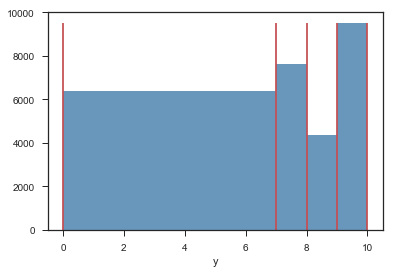

In [77]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference


# Instantiate the visualizer
visualizer = BalancedBinningReference(bins=[0,7.01,8.01,9.01,10])

y = df['RATINGHS']
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [6]:
df.astype('int32').dtypes

index         int32
CONTROL       int32
YEAR          int32
RATINGHS      int32
RATINGNH      int32
TOTROOMS      int32
PERPOVLVL     int32
DINING        int32
LAUNDY        int32
STORIES       int32
HHAGE         int32
HHMOVE        int32
PARTNER       int32
NUMELDERS     int32
NUMADULTS     int32
NUMNONREL     int32
HHYNGKIDS     int32
HHOLDKIDS     int32
NUMVETS       int32
NUMYNGKIDS    int32
NUMOLDKIDS    int32
NUMSUBFAM     int32
NUMSECFAM     int32
NUMPEOPLE     int32
HHADLTKIDS    int32
MULTIGEN      int32
UFINROOMS     int32
LOTSIZE       int32
FINROOMS      int32
UNITSIZE      int32
              ...  
SEARCHFAM     int32
SEARCHLIST    int32
SEARCHNET     int32
SEARCHOTH     int32
SEARCHPUB     int32
SEARCHREA     int32
SEARCHSIGN    int32
RMCHANGE      int32
RMCOMMUTE     int32
RMCOSTS       int32
RMFAMILY      int32
RMHOME        int32
RMHOOD        int32
RMJOB         int32
RMOWNHH       int32
RMOTHER       int32
OWNLOT        int32
HHSEX         int32
KITEXCLU      int32


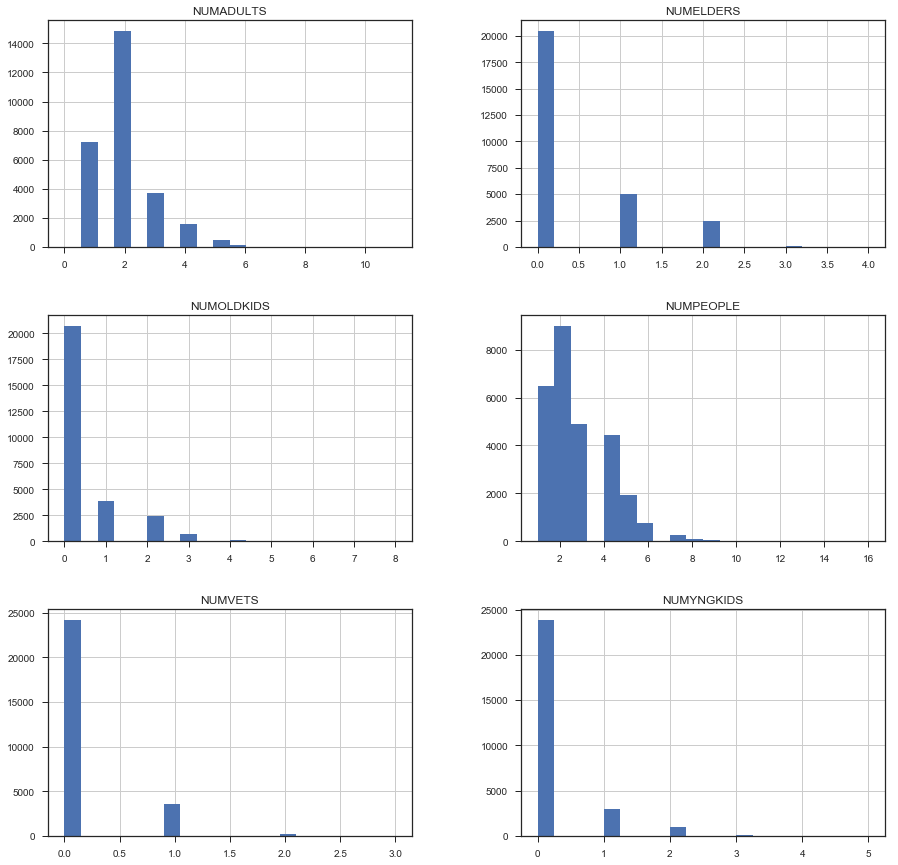

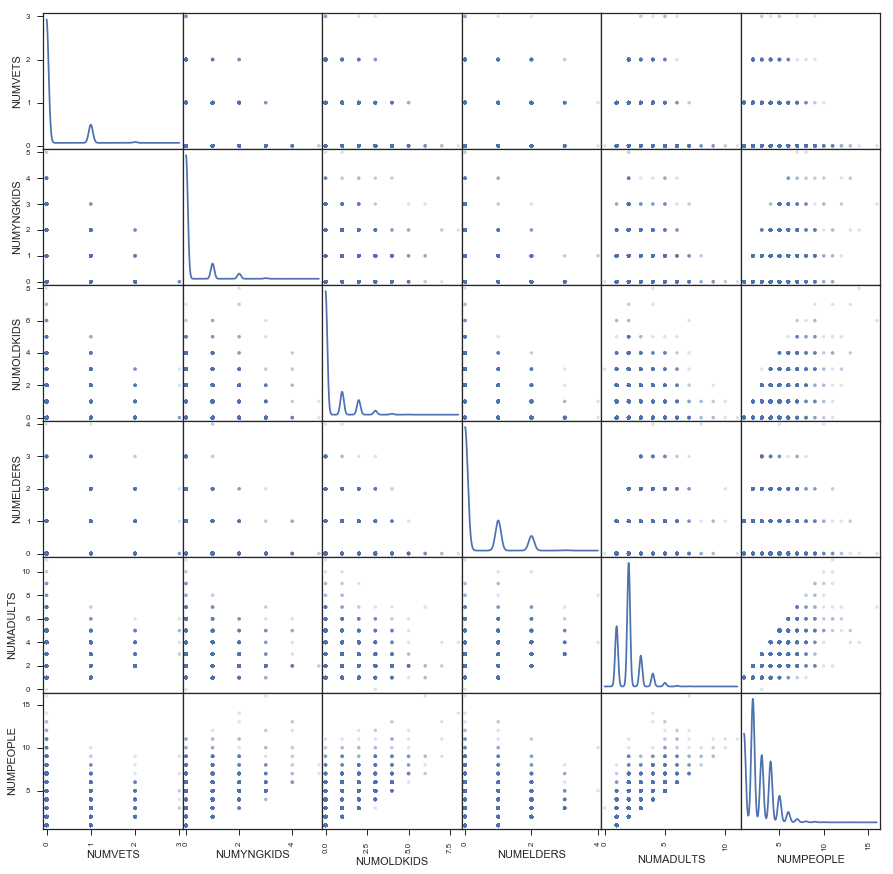

In [17]:
df_people = df.loc[:, ['NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMELDERS','NUMADULTS', 'NUMPEOPLE']]
df_people.hist(bins = 20, figsize=(15, 15))
attributes = ['NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMELDERS','NUMADULTS', 'NUMPEOPLE']
scatter_matrix(df_people[attributes], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

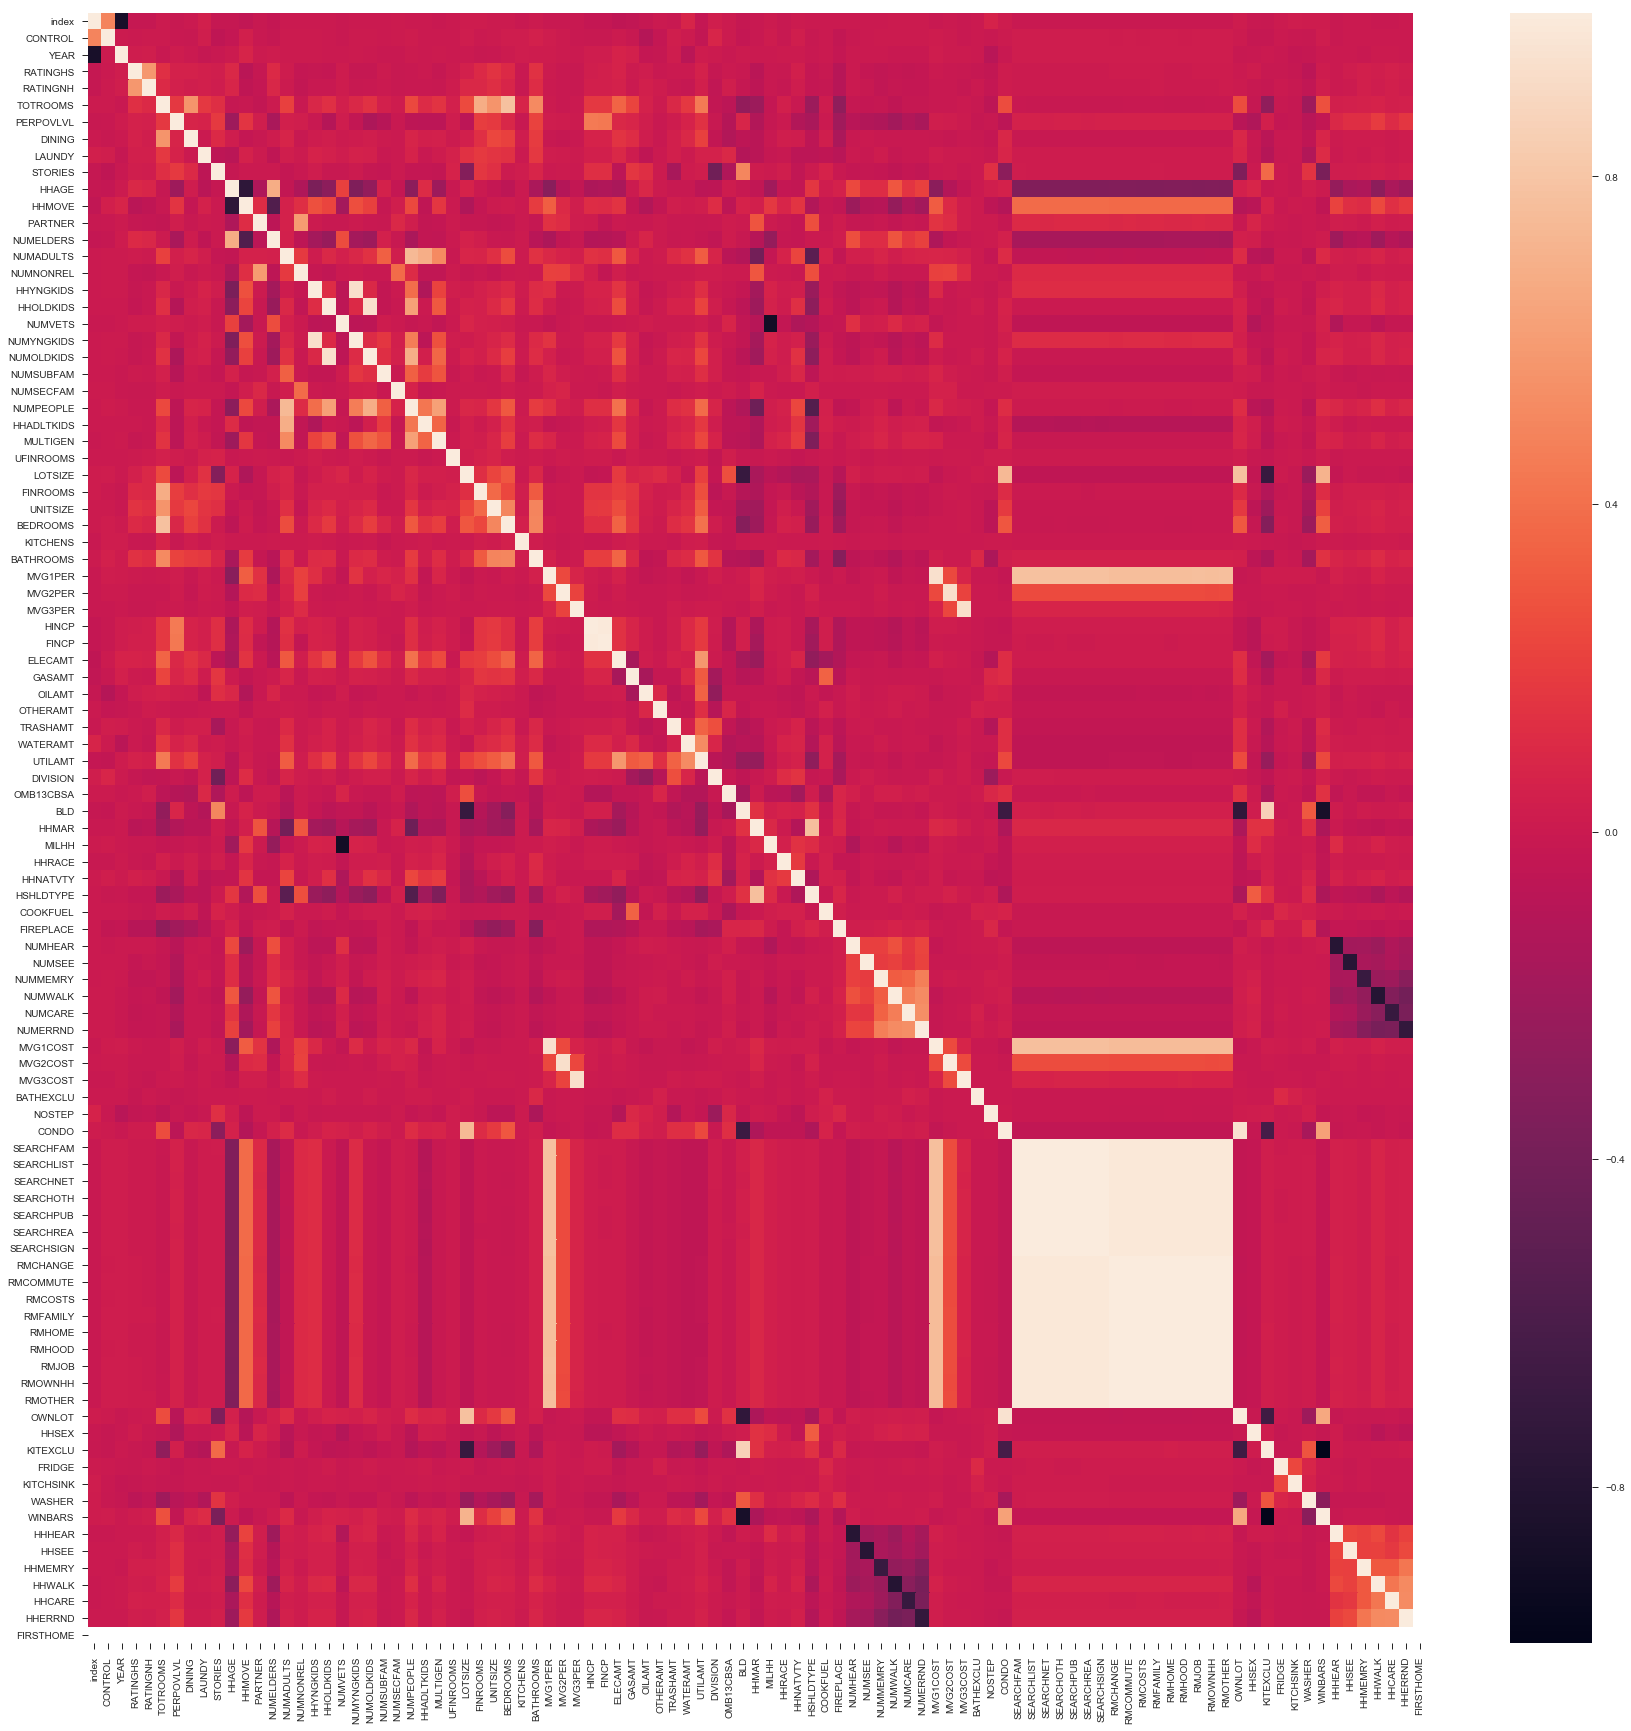

In [30]:
plt.subplots(figsize = (30,30))
ax = sns.heatmap(df.corr())

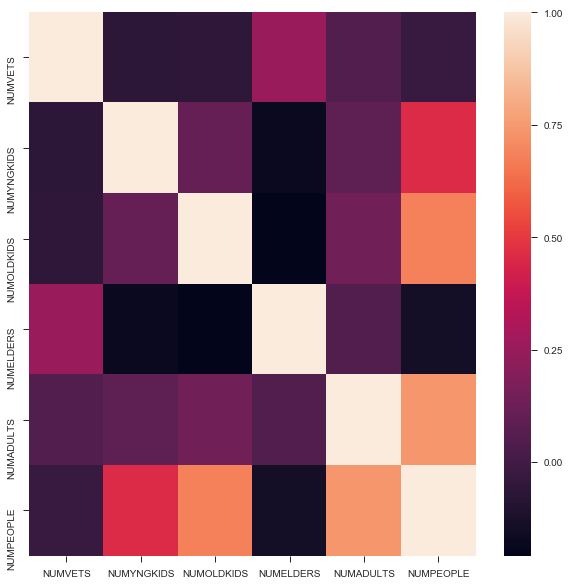

In [35]:
plt.subplots(figsize = (10,10))
bx = sns.heatmap(df_people.corr())

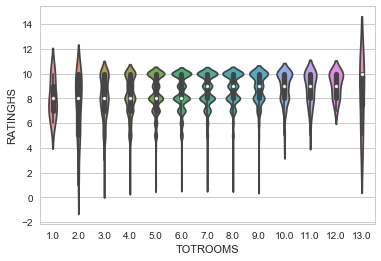

In [49]:
sns.set(style="whitegrid")
 
sns.violinplot(x="TOTROOMS", y="RATINGHS", data=df, figsize = (15,15))
#sns.violinplot(x="UNITSIZE", y="RATINGHS", data=df)
#sns.violinplot(x="BATHROOMS", y="RATINGHS", data=df)

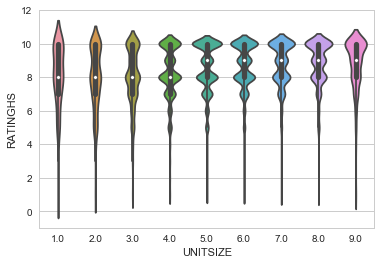

In [50]:
sns.set(style="whitegrid")
 
#sns.violinplot(x="TOTROOMS", y="RATINGHS", data=df, figsize = (15,15))
sns.violinplot(x="UNITSIZE", y="RATINGHS", data=df)
#sns.violinplot(x="BATHROOMS", y="RATINGHS", data=df)

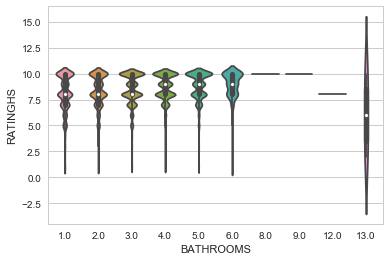

In [56]:
sns.set(style="whitegrid")
 
#sns.violinplot(x="TOTROOMS", y="RATINGHS", data=df, figsize = (15,15))
#sns.violinplot(x="UNITSIZE", y="RATINGHS", data=df)
sns.violinplot(x="BATHROOMS", y="RATINGHS", data=df) 

In [65]:
LABEL_MAP = {1: "Un-Satisfied",
    2: "Un-Satisfied",
    3: "Un-Satisfied",
    4: "Un-Satisfied",
    5: "Un-Satisfied",
    6: "Un-Satisfied",
    7: "Satisfied",
    8: "Satisfied",
    9: "Highly Satisfied",
    10: "Extreme Satisfied"}
df['RATINGHS'] = df['RATINGHS'].map(LABEL_MAP)
classes = ["Un-Satisfied", "Satisfied", "Highly Satisfied", "Extreme Satisfied"]

KeyboardInterrupt: 

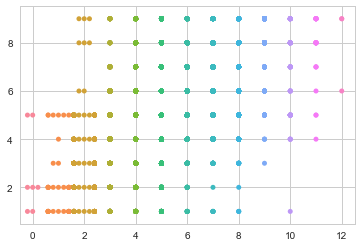

In [67]:
sns.set(style="whitegrid")
sns.swarmplot(x="TOTROOMS", y="UNITSIZE", data=df)

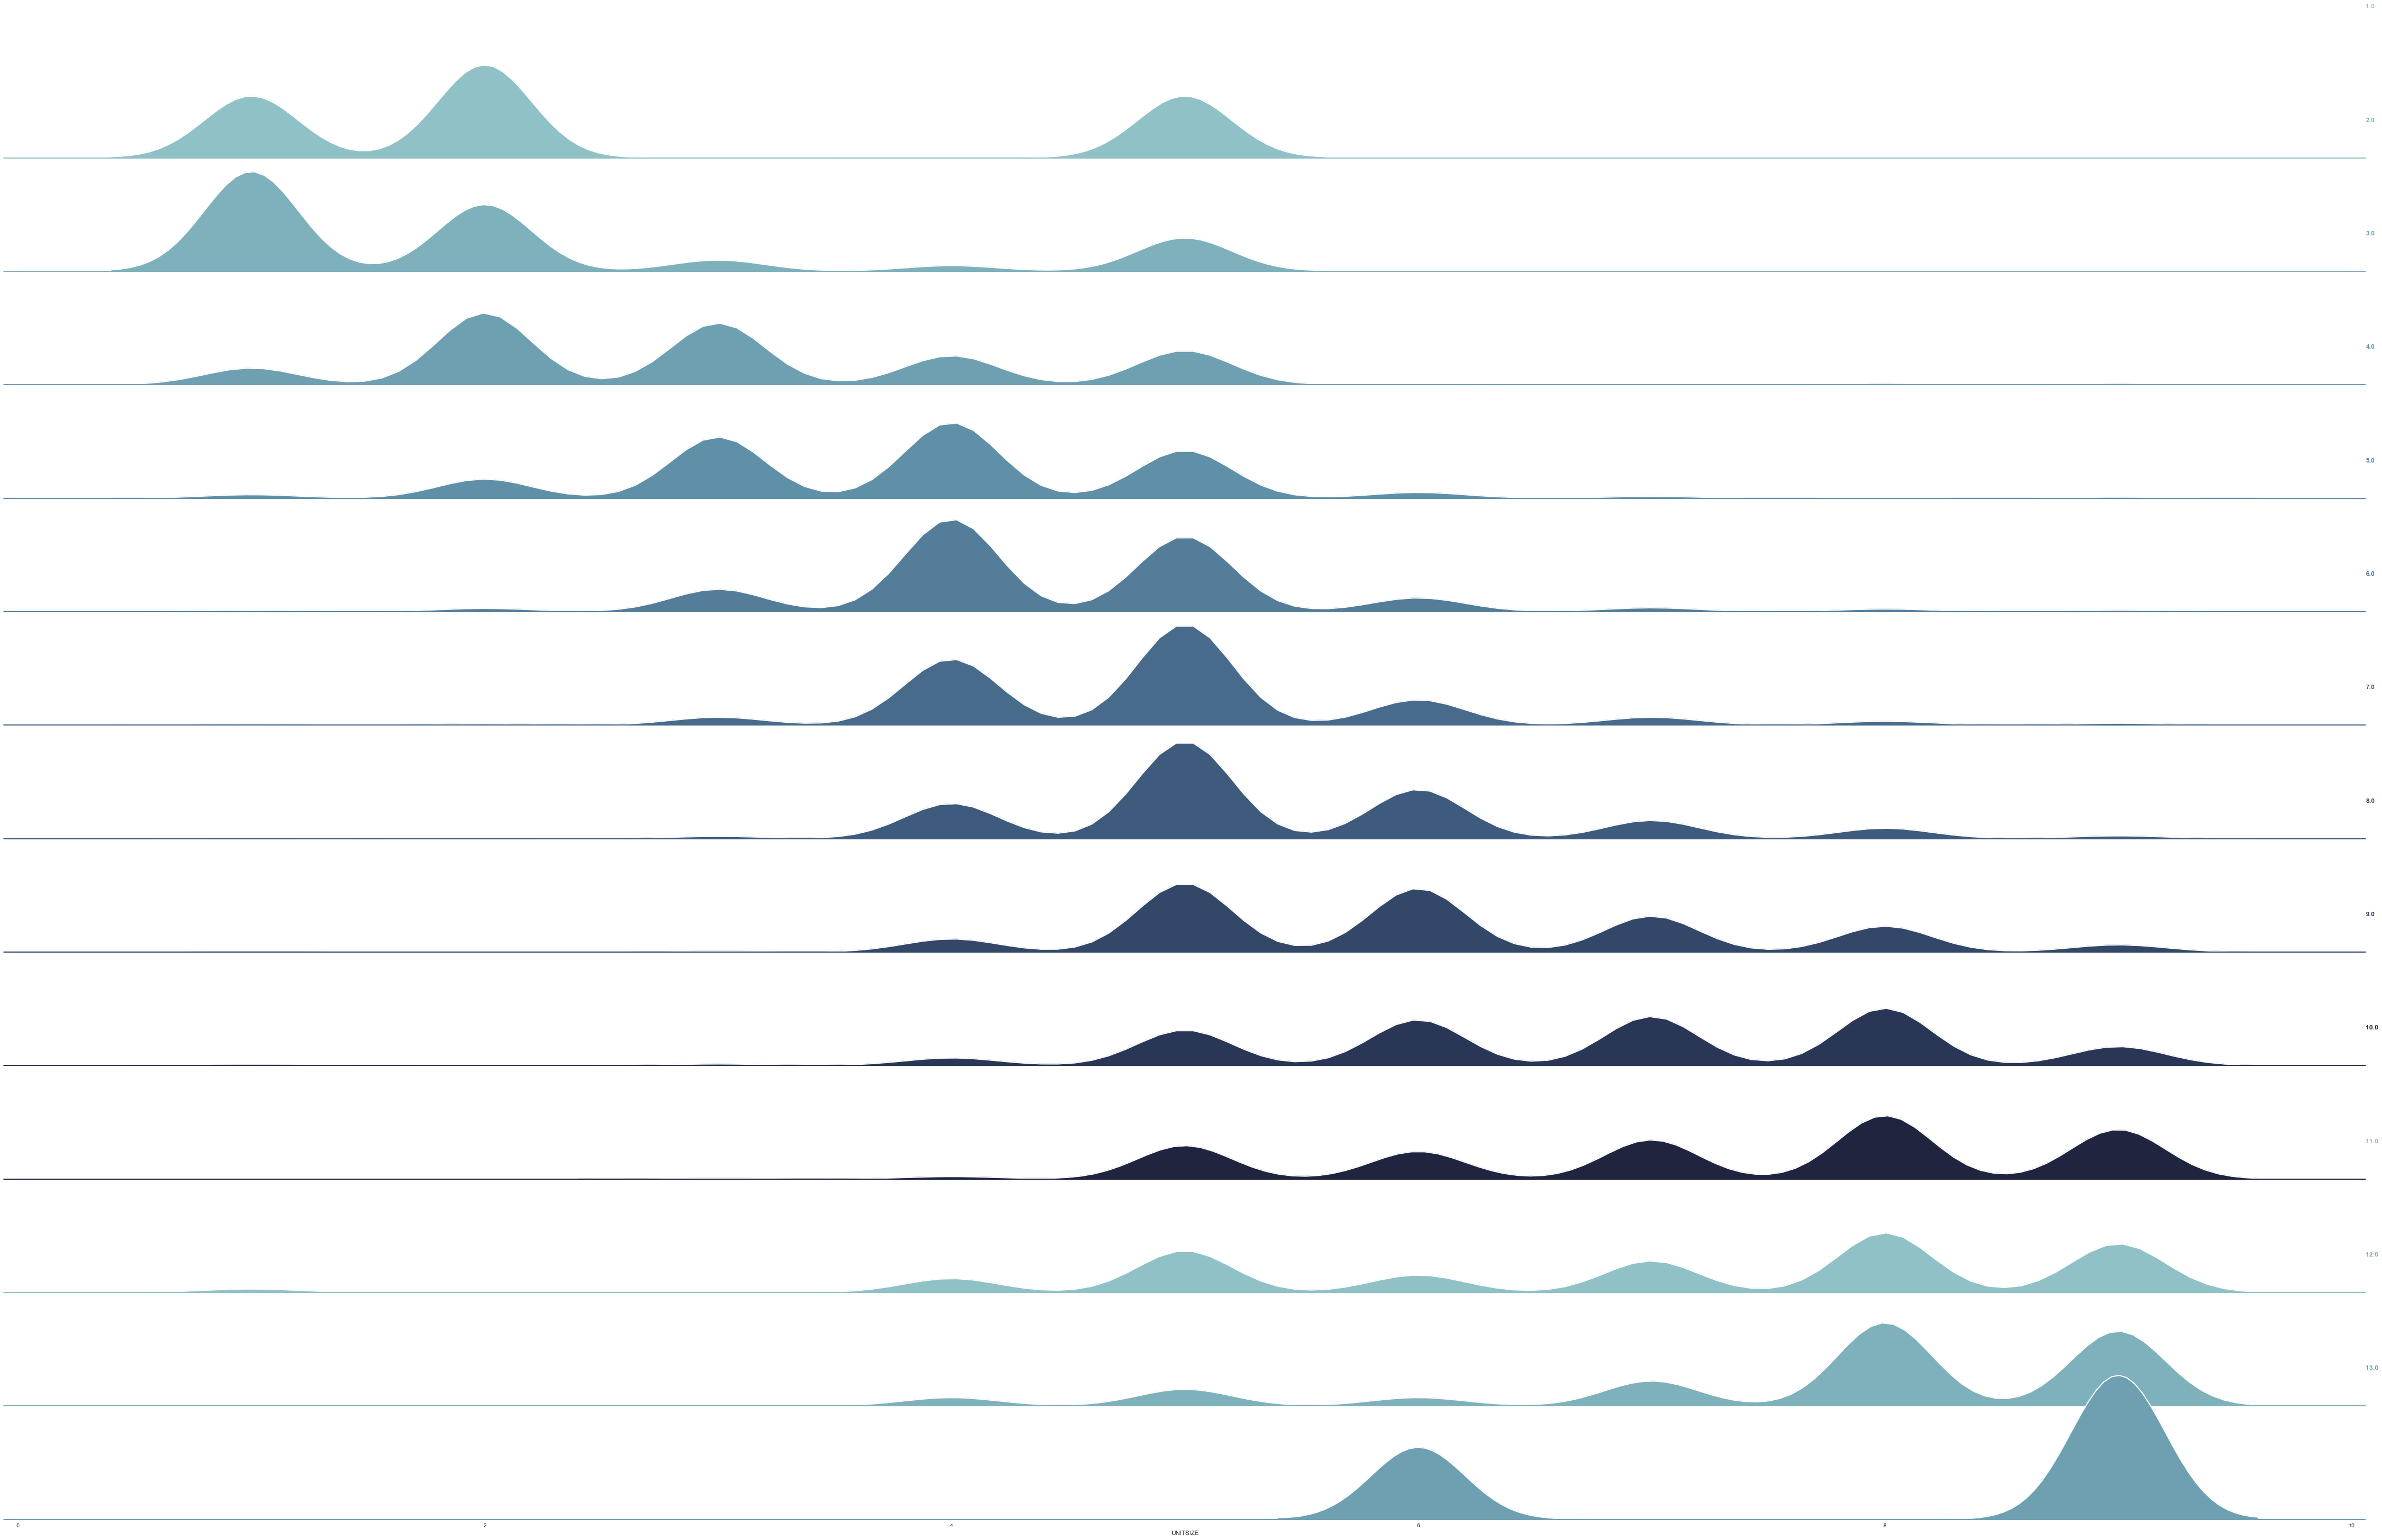

In [78]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
 
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="TOTROOMS", hue="TOTROOMS", aspect=20, palette=pal)
 
g.map(sns.kdeplot, "UNITSIZE", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "UNITSIZE", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
 
def label(UNITSIZE, color, label):
    ax = plt.gca()
    ax.text(1, 1, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
 
g.map(label, "UNITSIZE")
 
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)
 
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [94]:
df.dtypes

index           int64
CONTROL         int64
YEAR            int64
RATINGHS      float64
RATINGNH      float64
TOTROOMS      float64
PERPOVLVL     float64
DINING        float64
LAUNDY        float64
STORIES       float64
HHAGE         float64
HHMOVE        float64
PARTNER       float64
NUMELDERS     float64
NUMADULTS     float64
NUMNONREL     float64
HHYNGKIDS     float64
HHOLDKIDS     float64
NUMVETS       float64
NUMYNGKIDS    float64
NUMOLDKIDS    float64
NUMSUBFAM     float64
NUMSECFAM     float64
NUMPEOPLE     float64
HHADLTKIDS    float64
MULTIGEN      float64
UFINROOMS     float64
LOTSIZE       float64
FINROOMS      float64
UNITSIZE      float64
               ...   
SEARCHFAM     float64
SEARCHLIST    float64
SEARCHNET     float64
SEARCHOTH     float64
SEARCHPUB     float64
SEARCHREA     float64
SEARCHSIGN    float64
RMCHANGE      float64
RMCOMMUTE     float64
RMCOSTS       float64
RMFAMILY      float64
RMHOME        float64
RMHOOD        float64
RMJOB         float64
RMOWNHH   

In [95]:
features = ['TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH',
       'RMOTHER', 'OWNLOT', 'HHSEX', 'KITEXCLU', 'FRIDGE', 'KITCHSINK',
       'WASHER', 'WINBARS', 'HHHEAR', 'HHSEE', 'HHMEMRY', 'HHWALK', 'HHCARE',
       'HHERRND', 'FIRSTHOME']
target = ['RATINGHS']

In [96]:
y = df[target]
X = df[features]

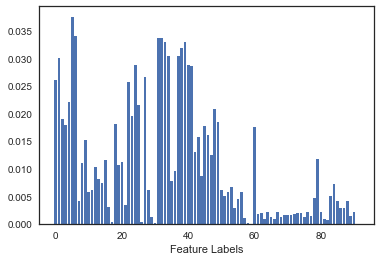

In [131]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xlabel('Feature Labels')
plt.show()
#print(model.feature_importances_)

#plt.bar(X, model.feature_importances_) 
#plt.xlabel('Feature Labels') 
#plt.ylabel('Feature Importances') 
#plt.title('Comparison of different Feature Importances') 

Text(0.5,1,'Comparison of different Feature Importances')

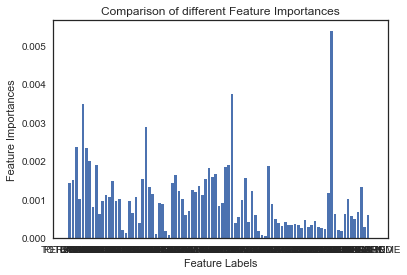

In [119]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 10) 
extra_tree_forest.fit(X, y.values.ravel()) 
feature_importance = extra_tree_forest.feature_importances_ 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 

# Decision Tree Classifier

In [135]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['TOTROOMS', 'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE', 'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS', 'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM', 
                'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS', 'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS', 'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 
                'GASAMT', 'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION', 'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE', 'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE',
                'NUMMEMRY', 'NUMWALK', 'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU', 'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH', 'SEARCHPUB', 'SEARCHREA', 
                'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE', 'RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH', 'RMOTHER', 'OWNLOT', 'HHSEX', 'KITEXCLU', 'FRIDGE', 'KITCHSINK', 'WASHER', 'WINBARS', 'HHHEAR', 
                'HHSEE', 'HHMEMRY', 'HHWALK', 'HHCARE', 'HHERRND', 'FIRSTHOME']
X = df[feature_cols] 
y = df.RATINGHS 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.26698507462686566


In [141]:
# Anaconda prompt - 
#pip install graphviz
#pip install pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',  '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('satisfaction.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found